<a href="https://colab.research.google.com/github/rowaina2025/python_dataScience/blob/ourCodes/Copy_of_Statistics_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics Lab1

## Imports

In [30]:
import matplotlib.pyplot as plt #Python 2D plotting library
from scipy.stats import norm #Python package for distributions
import numpy as np #Python package for powerful N-dimensional array operations

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

## Distribution Operations

In [ ]:
def generate_data(x_min = -5.0, x_max = 5.0, num = 1000):
   
    x = np.linspace(x_min, x_max, num) #Hint: try np.linspace() method
    return x

In [ ]:
def compute_mean_std(x):
    
    mean = np.mean(x) #Hint: use np for this purpose
    std = np.std(x) #Hint: use np for this purpose
    return mean, std

In [ ]:
def get_normal_pdf(x, mean = 0, std = 1.0):
    
    y = norm.pdf(x, mean, std)     #Try to write your own pdf expression. Otherwise, you can use the built-in one
    
    return y

In [ ]:
def standardize(y):
    mean, std = compute_mean_std(y)
    z = (y-mean)/std
    return z

## Normal Distribution Plot

It's required to implement a function that plots normal distribution for a given array of numbers distributed over a given range.

Please, follow the following signature:

In [ ]:
def plot_normal(x, y = None):#, xlim_min = -1.0, xlim_max = 1.0, ylim_min = 0, ylim_max = 1.0):
    """
    Plots the pdf of the normal (Gaussian) distribution

    Parameters:
    x (array-like): the data points to be plotted
    xlim_min (float): the lower bound of x axis
    xlim_max (float): the upper bound of x axis
    ylim_min (float): the lower bound of y axis
    ylim_max (float): the upper bound of y axis
    """
    
    if y is None:
        y = get_normal_pdf(x)
    plt.xlim(x_min,x_max)
    plt.ylim(ylim_min,ylim_max)
    plt.plot(x,y , color = 'blue', linewidth=4)      
    plt.show()


## Driver Code

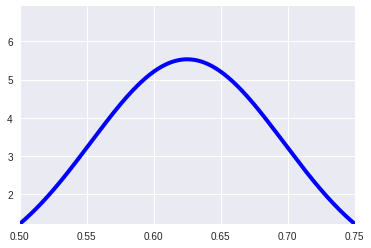

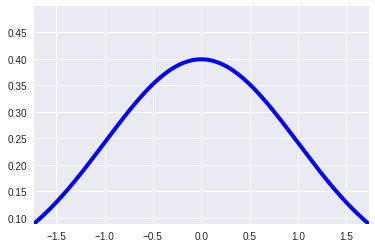

In [ ]:
x_min = 0.5
x_max = 0.75
x = generate_data(x_min, x_max, 100000)
mean, std = compute_mean_std(x)

y = get_normal_pdf(x, mean, std)
ylim_max = np.max(y) + np.max(y)/4
ylim_min = np.min(y)
plot_normal(x, y) #, x_min, x_max, ylim_min, ylim_max)

z = standardize(x)

x_min = z[0]
x_max = z[len(z) - 1]

new_mean, new_std = compute_mean_std(z)

new_y = get_normal_pdf(z, new_mean, new_std)
x_min = np.min(z) 
x_max = np.max(z)
ylim_min = np.min(new_y)
ylim_max = np.max(new_y) + np.max(new_y)/4
plot_normal(z, new_y)#, x_min, x_max, ylim_min, ylim_max)

## Bonus Part

### CDF 

In [46]:
def compute_inverse_cdf(p, mean = 0, std = 1):
    """
    Computes the inverse of CDF, where P{X <= x} = p

    Parameters:
    p (float): the value of the CDF, where 0 <= p <= 1
    mean a.k.a µ (float): the mean of the normal distribution
    std a.k.a σ (float): the standard deviation of the normal distribution mean

    Returns:
    x (float): the point that satisfies the equation P{X <= x} = p
    """
    x = norm.ppf(p, mean, std) #value of x at CDF = p
    return x

### CDF Plot

In [87]:
def plot_cdf(x, cdf=0.5):
    """
    Plots the cdf of the normal (Gaussian) distribution at a given certain point

    Parameters:
    x (array-like): the data points to be plotted
    cdf: the plot shaded percentage that representins the normal distribution cdf
    """
    Y = norm.cdf(x) #Y --> y-axis   x --> x-axis 
    inv =compute_inverse_cdf(cdf, np.mean(x), np.std(x)) # inv --> x axis value   cdf --> y-axis value
    plt.plot(x,Y, 'bo', c = 'r')
    plt.plot([inv,inv],[np.min(Y),cdf], color = 'y' , linewidth = 2)
    plt.plot([np.min(x),inv],[cdf,cdf], color = 'y' , linewidth = 2)
    plt.show()
    plt.ylim(0,cdf)
    plt.xlim(np.min(x),inv)
    plt.plot(x,Y, 'bo')
    plt.xlabel('X')
    plt.ylabel('PDF')
    plt.show()

### Driver Code

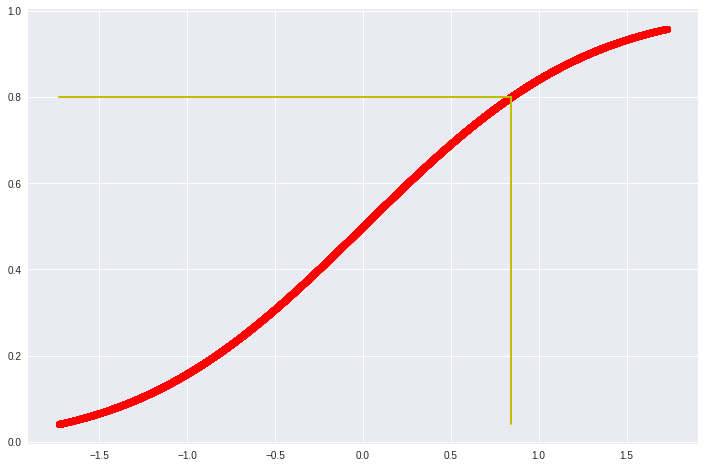

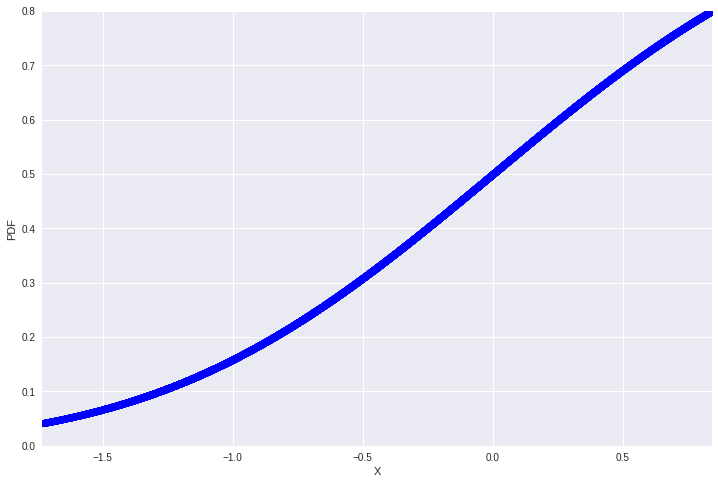

In [88]:
percent = 0.8
x = generate_data(x_min, x_max, 10000)
plot_cdf(x, percent)